In [26]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '09c678f3-f1dd-4415-bedd-0c4ea1f9d2d6',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

{'status': {'timestamp': '2024-10-05T15:26:49.503Z', 'error_code': 0, 'error_message': None, 'elapsed': 21, 'credit_count': 1, 'notice': None, 'total_count': 9848}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 11755, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

In [27]:
type(data)

dict

In [28]:
import pandas as pd


# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)

In [29]:
df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11755,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.976344e+07,1.976344e+07,False,NaN,1,NaN,NaN,None,2024-10-05T15:25:00.000Z,62157.770400,1.856686e+10,-40.5203,-0.047069,0.803397,-5.331392,10.317204,10.707358,9.347110,1.228451e+12,56.9265,1.305313e+12,None,2024-10-05T15:25:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-05 22:27:01.620232
1,1027,Ethereum,ETH,ethereum,9376,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.203752e+08,1.203752e+08,True,NaN,2,NaN,NaN,None,2024-10-05T15:24:00.000Z,2410.044378,1.031460e+10,-31.9464,-0.040069,0.771675,-9.714223,1.467144,-4.358928,-18.774084,2.901097e+11,13.4437,2.901097e+11,None,2024-10-05T15:24:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-05 22:27:01.620232
2,825,Tether USDt,USDT,tether,99416,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,1.196420e+11,1.213726e+11,True,NaN,3,NaN,NaN,None,2024-10-05T15:24:00.000Z,0.999927,3.626066e+10,-33.8787,-0.015850,0.009950,-0.026107,-0.002483,-0.032319,0.021120,1.196333e+11,5.5438,1.213638e+11,None,2024-10-05T15:24:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-10-05 22:27:01.620232
3,1839,BNB,BNB,bnb,2252,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.459325e+08,1.459325e+08,False,NaN,4,NaN,NaN,None,2024-10-05T15:24:00.000Z,561.927124,1.453770e+09,-4.6772,0.042736,1.870604,-6.710334,11.628021,15.640752,12.545815,8.200343e+10,3.7991,8.200343e+10,None,2024-10-05T15:24:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-05 22:27:01.620232
4,5426,Solana,SOL,solana,749,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.685971e+08,5.859800e+08,True,NaN,5,NaN,NaN,None,2024-10-05T15:24:00.000Z,142.769591,1.492660e+09,-39.6075,-0.245255,0.429423,-9.213589,8.213122,-1.725922,3.633170,6.690142e+10,3.1007,8.366012e+10,None,2024-10-05T15:24:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-05 22:27:01.620232
5,3408,USDC,USDC,usd-coin,22298,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,3.552343e+10,3.552343e+10,False,NaN,6,NaN,NaN,None,2024-10-05T15:24:00.000Z,0.999946,3.802602e+09,-36.8100,-0.002331,-0.003139,-0.003013,-0.025469,-0.010659,0.011650,3.552152e+10,1.6461,3.552152e+10,None,2024-10-05T15:24:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-10-05 22:27:01.620232
6,52,XRP,XRP,xrp,1400,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.656404e+10,9.998716e+10,False,NaN,7,NaN,NaN,None,2024-10-05T15:25:00.000Z,0.530546,8.819966e+08,-38.8384,-0.057222,1.664757,-14.375899,-3.421538,3.947789,23.813396,3.000981e+10,1.3907,5.305458e+10,None,2024-10-05T15:25:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-05 22:27:01.620232
7,74,Dogecoin,DOGE,dogecoin,1076,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.462414e+11,1.462414e+11,True,NaN,8,NaN,NaN,None,2024-10-05T15:25:00.000Z,0.108955,4.423856e+08,-40.2307,-0.002540,0.832541,-16.773705,10.738788,11.880496,2.421539,1.593375e+10,0.7382,1.593375e+10,None,2024-10-05T15:25:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-05 22:27:01.620232
8,11419,Toncoin,TON,toncoin,570,2021-08-26T13:40:22.000Z,"[pos, layer-1, ftx-bankruptcy-estate, dwf-labs...",NaN,2.53

In [39]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '09c678f3-f1dd-4415-bedd-0c4ea1f9d2d6',
    }
    
    session = Session()
    session.headers.update(headers)
    
    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)

    
    df = pd.json_normalize(data['data'])
    df['timestamp'] = pd.to_datetime('now')
    df

    if not os.path.isfile(r"C:\Users\HP Notebook\Data analysis with Anaconda\API\API.csv"):
        df.to_csv(r"C:\Users\HP Notebook\Data analysis with Anaconda\API\API.csv", header= 'column_names')
    else:
        df.to_csv(r"C:\Users\HP Notebook\Data analysis with Anaconda\API\API.csv", mode='a', header= False)



In [40]:
import os
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print ('API Runner completed')
    sleep(60) #sleep for 1 minute
exit()

{'status': {'timestamp': '2024-10-05T16:21:07.253Z', 'error_code': 0, 'error_message': None, 'elapsed': 25, 'credit_count': 1, 'notice': None, 'total_count': 9849}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 11755, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

KeyboardInterrupt: 

In [42]:
df72 = pd.read_csv(r"C:\Users\HP Notebook\Data analysis with Anaconda\API\API.csv")
df72

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,11755,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",2.100000e+07,1.976345e+07,1.976345e+07,False,NaN,1,NaN,NaN,NaN,2024-10-05T16:19:00.000Z,62114.798241,1.728396e+10,-44.1131,-0.043883,0.523663,-5.296946,10.903673,9.742592,9.039701,1.227603e+12,56.8907,1.304411e+12,NaN,2024-10-05T16:19:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-05 23:21:04.193471
1,1,1027,Ethereum,ETH,ethereum,9376,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,1.203752e+08,1.203752e+08,True,NaN,2,NaN,NaN,NaN,2024-10-05T16:19:00.000Z,2410.311540,9.422085e+09,-38.5105,0.016747,-0.667016,-9.698044,1.636388,-4.836190,-19.142554,2.901419e+11,13.4460,2.901419e+11,NaN,2024-10-05T16:19:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-05 23:21:04.193471
2,2,825,Tether USDt,USDT,tether,99417,2015-02-25T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'ava...",NaN,1.196420e+11,1.213726e+11,True,NaN,3,NaN,NaN,NaN,2024-10-05T16:19:00.000Z,0.999953,3.424268e+10,-36.9400,-0.009148,0.013438,-0.034400,0.005160,-0.070468,0.022961,1.196363e+11,5.5443,1.213669e+11,NaN,2024-10-05T16:19:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-10-05 23:21:04.193471
3,3,1839,BNB,BNB,bnb,2252,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,1.459325e+08,1.459325e+08,False,NaN,4,NaN,NaN,NaN,2024-10-05T16:19:00.000Z,562.955302,1.444445e+09,-5.0471,0.216439,1.668305,-6.328374,12.613757,15.087667,12.270119,8.215347e+10,3.8098,8.215347e+10,NaN,2024-10-05T16:19:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-05 23:21:04.193471
4,4,5426,Solana,SOL,solana,749,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,4.685969e+08,5.859798e+08,True,NaN,5,NaN,NaN,NaN,2024-10-05T16:19:00.000Z,142.555629,1.394839e+09,-41.1420,-0.113119,0.155152,-9.149854,9.180935,-2.597038,3.263997,6.680113e+10,3.0956,8.353472e+10,NaN,2024-10-05T16:19:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-05 23:21:04.193471
5,5,3408,USDC,USDC,usd-coin,22298,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,3.552095e+10,3.552095e+10,False,NaN,6,NaN,NaN,NaN,2024-10-05T16:19:00.000Z,0.999961,3.504511e+09,-41.4359,-0.008580,-0.003652,-0.007247,-0.002246,-0.034839,0.002035,3.551956e+10,1.6461,3.551956e+10,NaN,2024-10-05T16:19:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-10-05 23:21:04.193471
6,6,52,XRP,XRP,xrp,1400,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",1.000000e+11,5.656404e+10,9.998716e+10,False,NaN,7,NaN,NaN,NaN,2024-10-05T16:20:00.000Z,0.529110,8.245120e+08,-42.1112,-0.150009,0.830368,-14.298830,-3.104021,3.180313,23.053685,2.992861e+10,1.3870,5.291101e+10,NaN,2024-10-05T16:20:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-05 23:21:04.193471
7,7,74,Dogecoin,DOGE,dogecoin,1076,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",NaN,1.462419e+11,1.462419e+11,True,NaN,8,NaN,NaN,NaN,2024-10-05T16:20:00.000Z,0.109293,4.327702e+08,-38.5308,0.372619,1.123691,-16.540957,12.728252,11.583081,1.292427,1.598325e+10,0.7411,1.598325e+10,NaN,2024-10-05T16:20:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-05 23:21:04.193471
8,8,11419,Toncoin,TON,toncoin,570,2021-08-26T13:40:22.000Z,"['pos', 'layer-1', 'ftx-bankruptcy-estate', 'd...

In [41]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11755,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.976345e+07,1.976345e+07,False,NaN,1,NaN,NaN,None,2024-10-05T16:19:00.000Z,62114.798241,1.728396e+10,-44.1131,-0.043883,0.523663,-5.296946,10.903673,9.742592,9.039701,1.227603e+12,56.8907,1.304411e+12,None,2024-10-05T16:19:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-05 23:21:04.193471
1,1027,Ethereum,ETH,ethereum,9376,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.203752e+08,1.203752e+08,True,NaN,2,NaN,NaN,None,2024-10-05T16:19:00.000Z,2410.311540,9.422085e+09,-38.5105,0.016747,-0.667016,-9.698044,1.636388,-4.836190,-19.142554,2.901419e+11,13.4460,2.901419e+11,None,2024-10-05T16:19:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-05 23:21:04.193471
2,825,Tether USDt,USDT,tether,99417,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,1.196420e+11,1.213726e+11,True,NaN,3,NaN,NaN,None,2024-10-05T16:19:00.000Z,0.999953,3.424268e+10,-36.9400,-0.009148,0.013438,-0.034400,0.005160,-0.070468,0.022961,1.196363e+11,5.5443,1.213669e+11,None,2024-10-05T16:19:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-10-05 23:21:04.193471
3,1839,BNB,BNB,bnb,2252,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.459325e+08,1.459325e+08,False,NaN,4,NaN,NaN,None,2024-10-05T16:19:00.000Z,562.955302,1.444445e+09,-5.0471,0.216439,1.668305,-6.328374,12.613757,15.087667,12.270119,8.215347e+10,3.8098,8.215347e+10,None,2024-10-05T16:19:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-05 23:21:04.193471
4,5426,Solana,SOL,solana,749,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.685969e+08,5.859798e+08,True,NaN,5,NaN,NaN,None,2024-10-05T16:19:00.000Z,142.555629,1.394839e+09,-41.1420,-0.113119,0.155152,-9.149854,9.180935,-2.597038,3.263997,6.680113e+10,3.0956,8.353472e+10,None,2024-10-05T16:19:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-05 23:21:04.193471
5,3408,USDC,USDC,usd-coin,22298,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,3.552095e+10,3.552095e+10,False,NaN,6,NaN,NaN,None,2024-10-05T16:19:00.000Z,0.999961,3.504511e+09,-41.4359,-0.008580,-0.003652,-0.007247,-0.002246,-0.034839,0.002035,3.551956e+10,1.6461,3.551956e+10,None,2024-10-05T16:19:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-10-05 23:21:04.193471
6,52,XRP,XRP,xrp,1400,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.656404e+10,9.998716e+10,False,NaN,7,NaN,NaN,None,2024-10-05T16:20:00.000Z,0.529110,8.245120e+08,-42.1112,-0.150009,0.830368,-14.298830,-3.104021,3.180313,23.053685,2.992861e+10,1.3870,5.291101e+10,None,2024-10-05T16:20:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-05 23:21:04.193471
7,74,Dogecoin,DOGE,dogecoin,1076,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.462419e+11,1.462419e+11,True,NaN,8,NaN,NaN,None,2024-10-05T16:20:00.000Z,0.109293,4.327702e+08,-38.5308,0.372619,1.123691,-16.540957,12.728252,11.583081,1.292427,1.598325e+10,0.7411,1.598325e+10,None,2024-10-05T16:20:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-05 23:21:04.193471
8,11419,Toncoin,TON,toncoin,570,2021-08-26T13:40:22.000Z,"[pos, layer-1, ftx-bankruptcy-estate, dwf-labs...",NaN,2.53526

In [43]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [44]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11755,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19763453.00000,19763453.00000,False,NaN,1,NaN,NaN,None,2024-10-05T16:19:00.000Z,62114.79824,17283958645.46428,-44.11310,-0.04388,0.52366,-5.29695,10.90367,9.74259,9.03970,1227602895640.94385,56.89070,1304410763061.48999,None,2024-10-05T16:19:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-05 23:21:04.193471
1,1027,Ethereum,ETH,ethereum,9376,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120375248.28639,120375248.28639,True,NaN,2,NaN,NaN,None,2024-10-05T16:19:00.000Z,2410.31154,9422085263.71791,-38.51050,0.01675,-0.66702,-9.69804,1.63639,-4.83619,-19.14255,290141850075.79980,13.44600,290141850075.79999,None,2024-10-05T16:19:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-05 23:21:04.193471
2,825,Tether USDt,USDT,tether,99417,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,119641989887.49706,121372645826.72647,True,NaN,3,NaN,NaN,None,2024-10-05T16:19:00.000Z,0.99995,34242682374.76902,-36.94000,-0.00915,0.01344,-0.03440,0.00516,-0.07047,0.02296,119636319658.07863,5.54430,121366893575.80000,None,2024-10-05T16:19:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-10-05 23:21:04.193471
3,1839,BNB,BNB,bnb,2252,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,145932499.03000,145932499.03000,False,NaN,4,NaN,NaN,None,2024-10-05T16:19:00.000Z,562.95530,1444445026.99348,-5.04710,0.21644,1.66830,-6.32837,12.61376,15.08767,12.27012,82153474012.64861,3.80980,82153474012.64999,None,2024-10-05T16:19:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-05 23:21:04.193471
4,5426,Solana,SOL,solana,749,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,468596945.62777,585979810.59613,True,NaN,5,NaN,NaN,None,2024-10-05T16:19:00.000Z,142.55563,1394838736.59355,-41.14200,-0.11312,0.15515,-9.14985,9.18094,-2.59704,3.26400,66801132188.60188,3.09560,83534720302.21001,None,2024-10-05T16:19:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-05 23:21:04.193471
5,3408,USDC,USDC,usd-coin,22298,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,35520950410.22068,35520950410.22068,False,NaN,6,NaN,NaN,None,2024-10-05T16:19:00.000Z,0.99996,3504511264.57781,-41.43590,-0.00858,-0.00365,-0.00725,-0.00225,-0.03484,0.00204,35519557440.26305,1.64610,35519557440.26000,None,2024-10-05T16:19:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-10-05 23:21:04.193471
6,52,XRP,XRP,xrp,1400,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,56564039920.00000,99987161962.00000,False,NaN,7,NaN,NaN,None,2024-10-05T16:20:00.000Z,0.52911,824512041.40670,-42.11120,-0.15001,0.83037,-14.29883,-3.10402,3.18031,23.05368,29928606671.66851,1.38700,52911013276.27000,None,2024-10-05T16:20:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-05 23:21:04.193471
7,74,Dogecoin,DOGE,dogecoin,1076,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,146241946383.70523,146241946383.70523,True,NaN,8,NaN,NaN,None,2024-10-05T16:20:00.000Z,0.10929,432770153.18507,-38.53080,0.37262,1.12369,-16.54096,12.72825,11.58308,1.29243,15983254877.83034,0.74110,15983254877.83000,None,2024-10-05T16:20:00.000Z,NaN,N

In [45]:
df3=df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-0.04388,0.52366,-5.29695,10.90367,9.74259,9.03970
Ethereum,0.01675,-0.66702,-9.69804,1.63639,-4.83619,-19.14255
Tether USDt,-0.00915,0.01344,-0.03440,0.00516,-0.07047,0.02296
BNB,0.21644,1.66830,-6.32837,12.61376,15.08767,12.27012
Solana,-0.11312,0.15515,-9.14985,9.18094,-2.59704,3.26400
USDC,-0.00858,-0.00365,-0.00725,-0.00225,-0.03484,0.00204
XRP,-0.15001,0.83037,-14.29883,-3.10402,3.18031,23.05368
Dogecoin,0.37262,1.12369,-16.54096,12.72825,11.58308,1.29243
Toncoin,0.01683,-1.23927,-9.33660,14.48243,-6.72872,-27.30925


In [46]:
df4 = df3.stack()
df4

name                                      
Bitcoin       quote.USD.percent_change_1h     -0.04388
              quote.USD.percent_change_24h     0.52366
              quote.USD.percent_change_7d     -5.29695
              quote.USD.percent_change_30d    10.90367
              quote.USD.percent_change_60d     9.74259
              quote.USD.percent_change_90d     9.03970
Ethereum      quote.USD.percent_change_1h      0.01675
              quote.USD.percent_change_24h    -0.66702
              quote.USD.percent_change_7d     -9.69804
              quote.USD.percent_change_30d     1.63639
              quote.USD.percent_change_60d    -4.83619
              quote.USD.percent_change_90d   -19.14255
Tether USDt   quote.USD.percent_change_1h     -0.00915
              quote.USD.percent_change_24h     0.01344
              quote.USD.percent_change_7d     -0.03440
              quote.USD.percent_change_30d     0.00516
              quote.USD.percent_change_60d    -0.07047
              quote.US

In [47]:
df5 = df4.to_frame(name='values')
df5

values
name                                               
Bitcoin      quote.USD.percent_change_1h   -0.04388
             quote.USD.percent_change_24h   0.52366
             quote.USD.percent_change_7d   -5.29695
             quote.USD.percent_change_30d  10.90367
             quote.USD.percent_change_60d   9.74259
             quote.USD.percent_change_90d   9.03970
Ethereum     quote.USD.percent_change_1h    0.01675
             quote.USD.percent_change_24h  -0.66702
             quote.USD.percent_change_7d   -9.69804
             quote.USD.percent_change_30d   1.63639
             quote.USD.percent_change_60d  -4.83619
             quote.USD.percent_change_90d -19.14255
Tether USDt  quote.USD.percent_change_1h   -0.00915
             quote.USD.percent_change_24h   0.01344
             quote.USD.percent_change_7d   -0.03440
             quote.USD.percent_change_30d   0.00516
             quote.USD.percent_change_60d  -0.07047
             quote.USD.percent_change_90d   0.02296
BNB          quote.USD.percent_change_1h    0.21644
             quote.USD.percent_change_24h   1.66830
             quote.USD.percent_change_7d   -6.32837
             quote.USD.percent_change_30d  12.61376
             quote.USD.percent_change_60d  15.08767
             quote.USD.percent_change_90d  12.27012
Solana       quote.USD.percent_change_1h   -0.11312
             quote.USD.percent_change_24h   0.15515
             quote.USD.percent_change_7d   -9.14985
             quote.USD.percent_change_30d   9.18094
             quote.USD.percent_change_60d  -2.59704
             quote.USD.percent_change_90d   3.26400
USDC         quote.USD.percent_change_1h   -0.00858
             quote.USD.percent_change_24h  -0.00365
             quote.USD.percent_change_7d   -0.00725
             quote.USD.percent_change_30d  -0.00225
             quote.USD.percent_change_60d  -0.03484
             quote.USD.percent_change_90d   0.00204
XRP          quote.USD.percent_change_1h   -0.15001
             quote.USD.percent_change_24h   0.83037
             quote.USD.percent_change_7d  -14.29883
             quote.USD.percent_change_30d  -3.10402
             quote.USD.percent_change_60d   3.18031
             quote.USD.percent_change_90d  23.05368
Dogecoin     quote.USD.percent_change_1h    0.37262
             quote.USD.percent_change_24h   1.12369
             quote.USD.percent_change_7d  -16.54096
             quote.USD.percent_change_30d  12.72825
             quote.USD.percent_change_60d  11.58308
             quote.USD.percent_change_90d   1.29243
Toncoin      quote.USD.percent_change_1h    0.01683
             quote.USD.percent_change_24h  -1.23927
             quote.USD.percent_change_7d   -9.33660
             quote.USD.percent_change_30d  14.48243
             quote.USD.percent_change_60d  -6.72872
             quote.USD.percent_change_90d -27.30925
TRON         quote.USD.percent_change_1h   -0.03693
             quote.USD.percent_change_24h  -1.99793
             quote.USD.percent_change_7d   -0.62543
             quote.USD.percent_change_30d   2.46628
             quote.USD.percent_change_60d  24.82309
             quote.USD.percent_change_90d  20.87000
Cardano      quote.USD.percent_change_1h    0.06115
             quote.USD.percent_change_24h  -0.42337
             quote.USD.percent_change_7d  -12.71499
             quote.USD.percent_change_30d   7.68296
             quote.USD.percent_change_60d   5.00812
             quote.USD.percent_change_90d  -1.86847
Avalanche    quote.USD.percent_change_1h    0.08859
             quote.USD.percent_change_24h  -1.79090
             quote.USD.percent_change_7d  -12.66228
             quote.USD.percent_change_30d  19.86628
             quote.USD.percent_change_60d  20.56442
             quote.USD.percent_change_90d  -1.69030
Shiba Inu    quote.USD.percent_change_1h   -0.50268
             quote.USD.percent_change_24h  -0.54161
             quote.USD.percent_change_7d  -12.78899
             quote.USD.percent_change_30d

In [48]:
df5.count()

values    90
dtype: int64

In [50]:
index = pd.Index(range(90))

df6 = df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-0.04388
1,Bitcoin,quote.USD.percent_change_24h,0.52366
2,Bitcoin,quote.USD.percent_change_7d,-5.29695
3,Bitcoin,quote.USD.percent_change_30d,10.90367
4,Bitcoin,quote.USD.percent_change_60d,9.74259
5,Bitcoin,quote.USD.percent_change_90d,9.03970
6,Ethereum,quote.USD.percent_change_1h,0.01675
7,Ethereum,quote.USD.percent_change_24h,-0.66702
8,Ethereum,quote.USD.percent_change_7d,-9.69804
9,Ethereum,quote.USD.percent_change_30d,1.63639


In [51]:
df7 = df6.rename(columns={'level_1':'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.04388
1,Bitcoin,quote.USD.percent_change_24h,0.52366
2,Bitcoin,quote.USD.percent_change_7d,-5.29695
3,Bitcoin,quote.USD.percent_change_30d,10.90367
4,Bitcoin,quote.USD.percent_change_60d,9.74259
5,Bitcoin,quote.USD.percent_change_90d,9.03970
6,Ethereum,quote.USD.percent_change_1h,0.01675
7,Ethereum,quote.USD.percent_change_24h,-0.66702
8,Ethereum,quote.USD.percent_change_7d,-9.69804
9,Ethereum,quote.USD.percent_change_30d,1.63639


In [55]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])
df7

,name,percent_change,values
0,Bitcoin,1h,-0.04388
1,Bitcoin,24h,0.52366
2,Bitcoin,7d,-5.29695
3,Bitcoin,30d,10.90367
4,Bitcoin,60d,9.74259
5,Bitcoin,90d,9.03970
6,Ethereum,1h,0.01675
7,Ethereum,24h,-0.66702
8,Ethereum,7d,-9.69804
9,Ethereum,30d,1.63639


In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

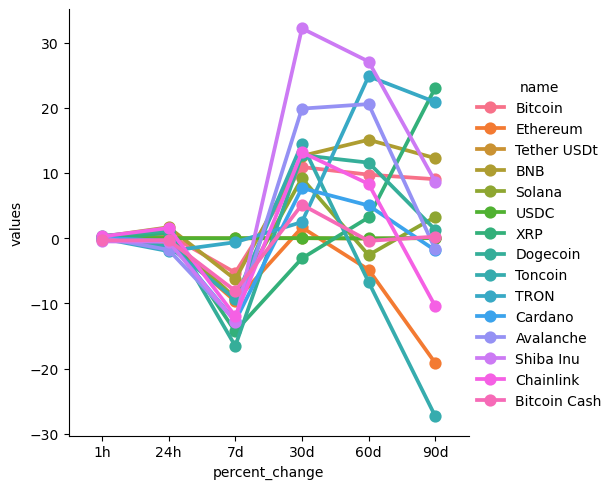

In [56]:
sns.catplot(x='percent_change',y='values',hue='name',data=df7, kind='point')

In [58]:
df10 = df[['name','quote.USD.price','timestamp']]
df10 = df10.query("name == 'Bitcoin'")
df10

,name,quote.USD.price,timestamp
0,Bitcoin,62114.79824,2024-10-05 23:21:04.193471


<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

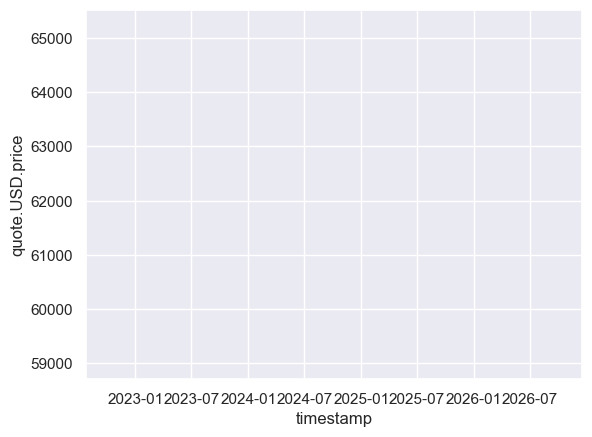

In [60]:
sns.set_theme(style="darkgrid")


sns.lineplot(x= 'timestamp', y='quote.USD.price' , data = df10)